    wl      HbO2        Hb
0  250  106112.0  112736.0
1  252  105552.0  112736.0
2  254  107660.0  112736.0
3  256  109788.0  113824.0
4  258  112944.0  115040.0


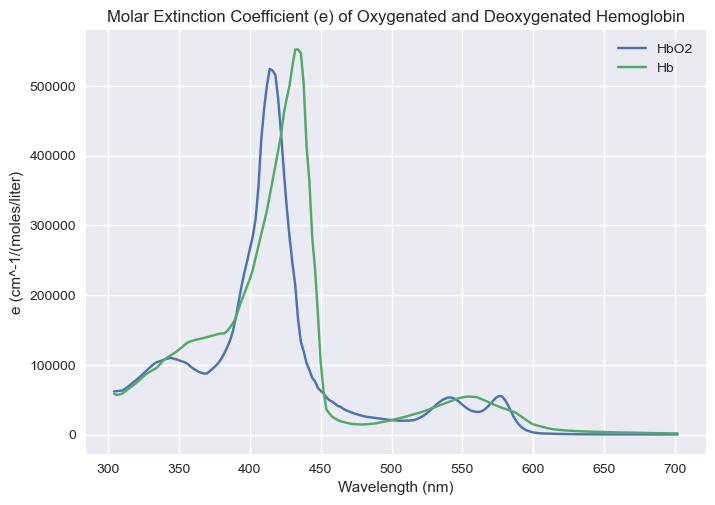

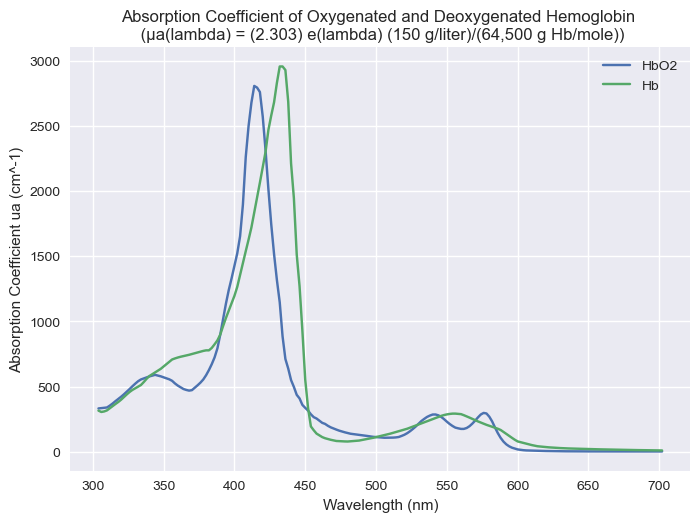

{}


In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
# headers = ['Wavelength', 'Eumelanin', 'Pheomelanin']

df = pd.read_csv("/Users/joeljohnson/Documents/Github/CG_Research/Data/hem.txt", sep='\t')
print(df.head())
WL = df.iloc[27:227,0].astype(int)
Hb02 = df.iloc[27:227,1].to_numpy().astype(float)
Hb = df.iloc[27:227,2].to_numpy().astype(float)
# Plot the data
plt.plot(WL, Hb02)
plt.plot(WL, Hb)
# plt.plot(WL, AbsorbanceHbO2)
plt.title("Molar Extinction Coefficient (e) of Oxygenated and Deoxygenated Hemoglobin")
plt.ylabel("e (cm^-1/(moles/liter)")
plt.xlabel("Wavelength (nm)")
plt.legend(["HbO2", "Hb"])
# plt.plot(WaveLength, Hb)

plt.show()
def get_ua(e):
      # μa(lambda) = (2.303) e(lambda) (150 g/liter)/(64,500 g Hb/mole)
      ua = 2.303*e*(150/64500)
      return ua


def get_ua_simple(e):
      #μa(lambda) = (2.303) e(lambda) (150 g/liter)/(64,500 g Hb/mole)
      # = 0.0054e(lambda)
      ua = 0.0054*e
      return ua

uaHb02 = get_ua(Hb02)
uaHb = get_ua(Hb)

      # whole[WL[i]] = uaHb02[i]+ uaHb[i]
plt.plot(WL, uaHb02)
plt.plot(WL, uaHb)
plt.title("Absorption Coefficient of Oxygenated and Deoxygenated Hemoglobin \n (μa(lambda) = (2.303) e(lambda) (150 g/liter)/(64,500 g Hb/mole))")
plt.ylabel("Absorption Coefficient ua (cm^-1)")
plt.xlabel("Wavelength (nm)")
plt.legend(["HbO2", "Hb"])
plt.show()




/var/folders/c0/9r1vps757pgfst2gn8pz_ggr0000gn/T/ipykernel_85862/2059136534.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,num.newaxis]
/Users/joeljohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joeljohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joeljohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed w

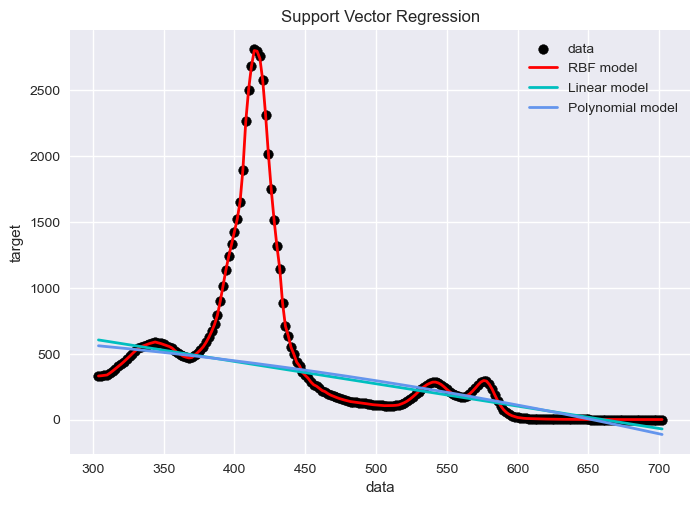

[3.31903189e+02 3.33845513e+02 3.36745419e+02 3.39401523e+02
 3.53433647e+02 3.69737174e+02 3.87682205e+02 4.04657077e+02
 4.21680935e+02 4.40448161e+02 4.60349788e+02 4.80830602e+02
 5.02103561e+02 5.22156278e+02 5.40644104e+02 5.54248544e+02
 5.62088897e+02 5.70037508e+02 5.77706441e+02 5.84005379e+02
 5.89531737e+02 5.83854859e+02 5.78241781e+02 5.70701526e+02
 5.62474290e+02 5.55276810e+02 5.43879100e+02 5.23848937e+02
 5.07330987e+02 4.93963396e+02 4.81044651e+02 4.73804148e+02
 4.68597776e+02 4.72154348e+02 4.90449484e+02 5.09452516e+02
 5.29782385e+02 5.53862771e+02 5.86704119e+02 6.26359120e+02
 6.71626090e+02 7.23642250e+02 7.93095821e+02 8.98327340e+02
 1.01611180e+03 1.13565423e+03 1.24037047e+03 1.33030599e+03
 1.42578856e+03 1.52215120e+03 1.65332535e+03 1.89697230e+03
 2.25951186e+03 2.50020786e+03 2.67887778e+03 2.79989059e+03
 2.79499247e+03 2.73917012e+03 2.57261857e+03 2.31296933e+03
 2.01494989e+03 1.74606694e+03 1.51619494e+03 1.31781607e+03
 1.14668681e+03 8.853872

In [11]:
import numpy as num
from sklearn.svm import SVR
import matplotlib.pyplot as plot
x = WL
y = uaHb02
x = x[:,num.newaxis]
y = y[:,num.newaxis]
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(x, y).predict(x)
y_lin = svr_lin.fit(x, y).predict(x)
y_poly = svr_poly.fit(x, y).predict(x)
lw = 2
#color black

plot.scatter(x, y, color='black', label='data')
plot.plot(x, y_rbf, color='r', lw=lw, label='RBF model')
plot.plot(x, y_lin, color='c', lw=lw, label='Linear model')
plot.plot(x, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')

plot.xlabel('data')
plot.ylabel('target')
plot.title('Support Vector Regression')
plot.legend()
plot.show()
print(y_rbf)

print('w = ',svr_rbf.class_weight)
print('b = ',svr_rbf.intercept_)
print('Indices of support vectors = ', svr_rbf.support_)
print('Support vectors = ', svr_rbf.support_vectors_)
print('Number of support vectors for each class = ', svr_rbf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svr_rbf.dual_coef_))

#create a new plot


In [8]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
#import metrics
#import mse
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
# Fit a non-liner model using SVR()
from sklearn.svm import SVR
#import metrics
from sklearn.metrics import mean_squared_error, r2_score
# Splitting the dataset into X and y
X = WL
y = Hb
X= X[:,num.newaxis]
y = y[:,num.newaxis]
# Build the model
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X, y)
print(model.score(X, y))


plt.plot(X, model.predict(X),lw=lw, label='RBF model')
plt.show()
    

NameError: name 'num' is not defined

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math
"""
formulas from  Optical Properties of Human Skin
"""
def get_us(lam):
    #us' = 1.1x10^12*lambda^-4 + 73.7*lambda^-0.22
    us = 1.1*math.pow(10,12)*math.pow(lam,-4) + 73.7*math.pow(lam,-0.22)
    return us

def get_ua(lam):
    #ua' = 1.1x10^12*lambda^-4 + 73.7*lambda^-0.22
    ua = 1.1*math.pow(10,12)*math.pow(lam,-4) + 73.7*math.pow(lam,-0.22)
    return ua
def get_g(lam):
    #g' = 1.1x10^12*lambda^-4 + 73.7*lambda^-0.22
    g = 1.1*math.pow(10,12)*math.pow(lam,-4) + 73.7*math.pow(lam,-0.22)
    return g

def get_dermis(lam):
    g = 0.715 + 3.8 * math.pow(10,-4)*(1-np.exp(-(lam-542)/1129))
    us = 1.752*math.pow(10,8)*math.pow(lam,-2.33)+134.67*math.pow(lam,-0.494)
    return g, us
def get_epidermis(lam):
    g = 0.745+0.546*(1-np.exp(-(lam-500)/1806))
    us = 1.752*math.pow(10,8)*math.pow(lam,-2.33)+134.67*math.pow(lam,-0.494)
    usp = 1.1752*math.pow(10,3)*math.pow(lam,-2.33)+134.67*math.pow(lam,-0.494)
    return g, us
print(get_us(500))
print(get_ua(500))
print(get_g(500))
wls = np.arange(400, 700, 100)
for i in wls:
    print(get_us(i))
    print(i)
print(get_dermis(500))


36.37993509196801
36.37993509196801
36.37993509196801
62.693626366052015
400
36.37993509196801
500
26.52921954674172
600
(0.7149855973603195, 96.39484624918998)


In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/joeljohnson/Documents/Github/CG_Research/Data/hem.txt", sep='\t')


#get data from df where 380<=WL<=780
hem = df.loc[(df.iloc[:,0] >= 380) & (df.iloc[:,0] <= 780)]
#count by 10
hem = hem.iloc[::5]
for i in range(0,len(hem)):
    hem.iloc[i,0] = hem.iloc[i,0].astype(int)
    hem.iloc[i,1] = hem.iloc[i,1].astype(float)
    hem.iloc[i,2] = hem.iloc[i,2].astype(float)
# print(hem)
O2Hb = {} 
Hb = {}




for i in range(0,len(hem)):
    wl= hem.iloc[i,0].astype(int)
    hbo2 = hem.iloc[i,1].astype(float)
    hb = hem.iloc[i,2].astype(float)
    O2Hb[wl] = hbo2
    Hb[wl] = hb

print(O2Hb)
print(Hb)
print(Hb[380])
print(O2Hb[380])
print(Hb[780])
print(O2Hb[780])




{380: 109564.0, 390: 167748.0, 400: 266232.0, 410: 466840.0, 420: 480360.0, 430: 246072.0, 440: 102580.0, 450: 62816.0, 460: 44480.0, 470: 33209.2, 480: 26629.2, 490: 23684.4, 500: 20932.8, 510: 20035.2, 520: 24202.4, 530: 39956.8, 540: 53236.0, 550: 43016.0, 560: 32613.2, 570: 44496.0, 580: 50104.0, 590: 14400.8, 600: 3200.0, 610: 1506.0, 620: 942.0, 630: 610.0, 640: 442.0, 650: 368.0, 660: 319.6, 670: 294.0, 680: 277.6, 690: 276.0, 700: 290.0, 710: 314.0, 720: 348.0, 730: 390.0, 740: 446.0, 750: 518.0, 760: 586.0, 770: 650.0, 780: 710.0}
{380: 145232.0, 390: 167780.0, 400: 223296.0, 410: 303956.0, 420: 407560.0, 430: 528600.0, 440: 413280.0, 450: 103292.0, 460: 23388.8, 470: 16156.4, 480: 14550.0, 490: 16684.0, 500: 20862.0, 510: 25773.6, 520: 31589.6, 530: 39036.4, 540: 46592.0, 550: 53412.0, 560: 53788.0, 570: 45072.0, 580: 37020.0, 590: 28324.4, 600: 14677.2, 610: 9443.6, 620: 6509.6, 630: 5148.8, 640: 4345.2, 650: 3750.12, 660: 3226.56, 670: 2795.12, 680: 2407.92, 690: 2051.96, 7

In [100]:
wl = np.linspace(380,780,41).astype(int)


[380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550
 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730
 740 750 760 770 780]


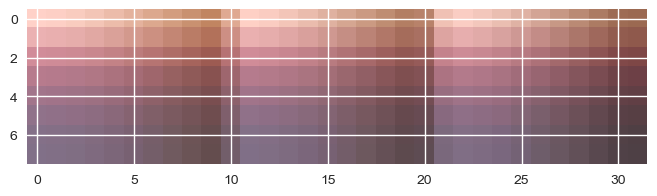

In [43]:
#load image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


img = mpimg.imread('/Users/joeljohnson/Documents/Github/CG_Research/PhysicalModels/skin_LUT copy.png')

img =cv2.resize(img, (0,0), fx=1.5, fy=1.5)
#read image to pixel array
imgplot = plt.imshow(img)
#show image


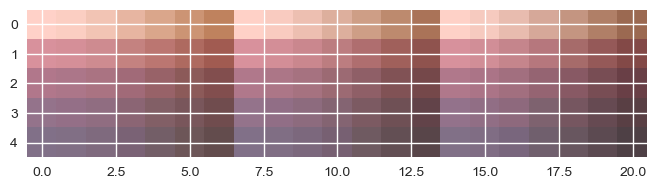

In [45]:
#load image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


img = mpimg.imread('/Users/joeljohnson/Documents/Github/CG_Research/PhysicalModels/skin_LUT copy.png')

# img =cv2.resize(img, (0,0), fx=1.5, fy=1.5)
#read image to pixel array
imgplot = plt.imshow(img)